# Homework Stage 09 - Feature Engineering (2nd Use Case)

Tasks:
Create 2-3 Engineering Features in Data set (include implementation code, markdown explanation of reasoning, and visualization of correlation check)
1. Open the starter notebook (stage09_feature-engineering_homework-starter.ipynb).
2. Replace the sample synthetic data with your project dataset.
3. Implement at least 2 new features.
4. Document each with a short rationale.
5. (Optional) Plot or test correlation with target variable.
6. Save and commit.

In [1]:
import pandas as pd
import numpy as np

#import Library and Creating the Data Set
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
    'credit_score': np.random.normal(680, 50, n).astype(int)

})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

In [2]:
#check the data set
df.head()

,date,region,age,income,transactions,credit_score,spend
0,2021-02-01,West,37.6,28086.81,4,629,141.37
1,2021-02-02,North,43.0,33034.75,1,661,67.54
2,2021-02-03,South,38.2,50045.39,2,705,77.84
3,2021-02-04,South,24.9,39467.28,4,700,151.02
4,2021-02-05,South,59.8,31201.65,1,707,20.87


## 2nd Assignment: Analysis/Capture Trend on 3-Month Spending Data
Code snippet: df['rolling_spend_mean'] = df['monthly_spend'].rolling(3).mean()

In [15]:
#Capture 3-month trend in spending behavior = Code snippet: df['rolling_spend_mean'] = df['monthly_spend'].rolling(3).mean()
df['spend_3m_trend'] = df['spend'].rolling(window=90).mean()


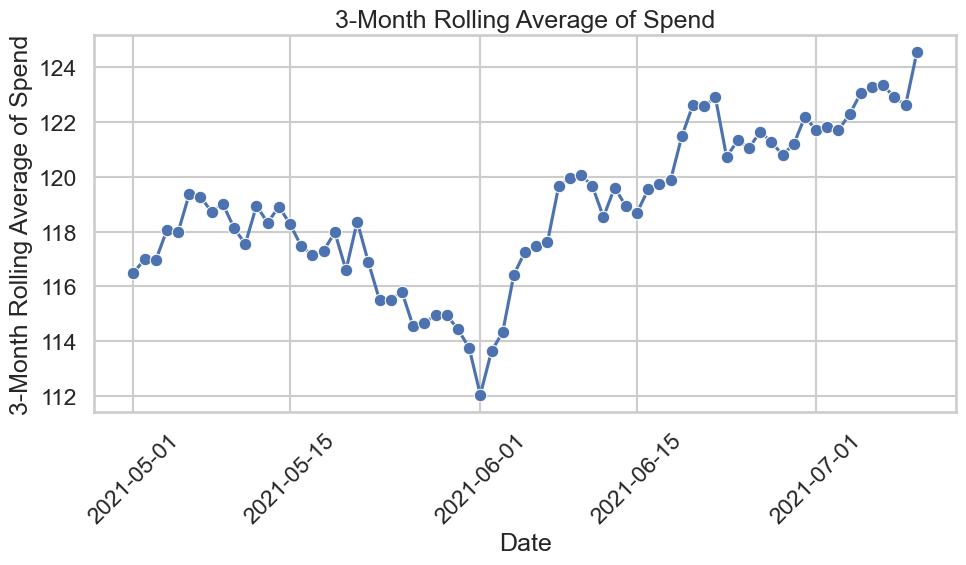

In [17]:
#visualzation of 3-month trend in spending behavior
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='spend_3m_trend', data=df, marker='o')
plt.title('3-Month Rolling Average of Spend')
plt.xlabel('Date')
plt.ylabel('3-Month Rolling Average of Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("processed_spend-3m-trend.png", dpi=300, bbox_inches="tight")
plt.show()

## Rationale for 3-Month Rolling Income Trend Analysis

Spending behavior can fluctuate significantly from day to day due to short-term noise, one-off events, or individual outliers. To better understand the underlying trend, it is useful to smooth the data using a rolling average. By calculating a 3-month rolling mean of spend, we capture the medium-term trajectory of customer behavior while reducing daily volatility. This helps to highlight meaningful patterns, such as seasonal spending cycles or gradual growth/decline over time, which might otherwise be obscured by noise in the raw data.

The 3-month rolling spend trend provides a clearer view of how customer spending evolves across the observed period. This transformation is especially relevant for:
1. Trend detection – spotting whether spending is increasing, stable, or declining over time.
2. Seasonality insights – identifying recurring cycles or seasonal effects that emerge across months.
3. Feature engineering – the rolling average can serve as a predictive feature in modeling, reflecting sustained customer engagement rather than short-term spikes.

By plotting the rolling trend over time, we can visually confirm whether customer spending exhibits consistent growth, cyclical dips, or irregular shocks, which is critical for both exploratory analysis and downstream forecasting models.

The line chart illustrates the 3-month rolling average of customer spending over time. Each point on the line represents the average spend across the preceding 90 days, which smooths out daily fluctuations and highlights the broader spending trend. The chart provides a visual narrative of how spending behavior evolves month to month, making it easier to identify sustained increases, declines, or periods of stability. Unlike raw daily spend, this rolling trend emphasizes medium-term patterns and helps uncover potential seasonal effects or structural changes in customer behavior.
